In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Exercício:

* Avalie o uso de filtros para eliminar ruídos e detectar contornos na imagem figs/11.jpg
* Utilize os padrões definidos em https://github.com/opencv/opencv/tree/master/data/haarcascades para criar dois classificadores, teste os classificadores com imagens aleatórias

## Remoção de ruídos

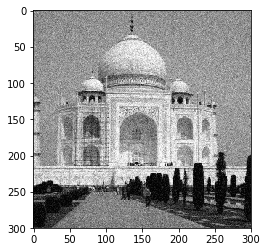

In [2]:
img = cv.imread('./../../figs/11.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img, cmap = 'gray');

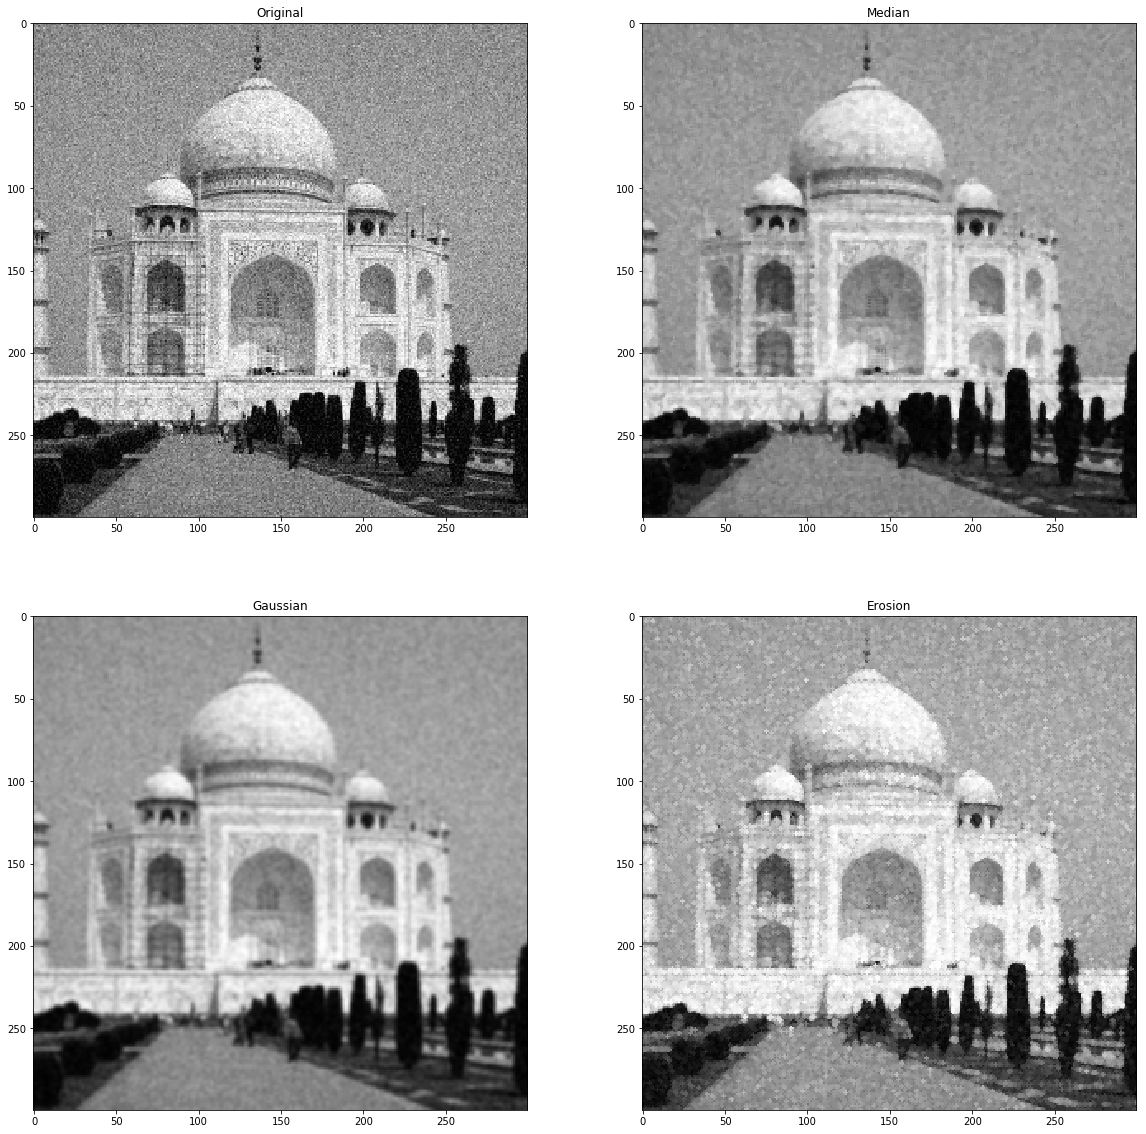

In [8]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

med = cv.medianBlur(img,3) # Median 
gau = cv.GaussianBlur(img,(5,5),0) # Gaussian
mor = cv.dilate(img, kernel, iterations = 1) # Morphological Transform

images = [img, med, gau, mor]
titles = ['Original','Median','Gaussian','Erosion']
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
for ind, p in enumerate(images):
    ax = axs[ind//2, ind%2]
    ax.title.set_text(titles[ind])
    ax.imshow(p, cmap='gray')
plt.show()

## Detecção de contornos

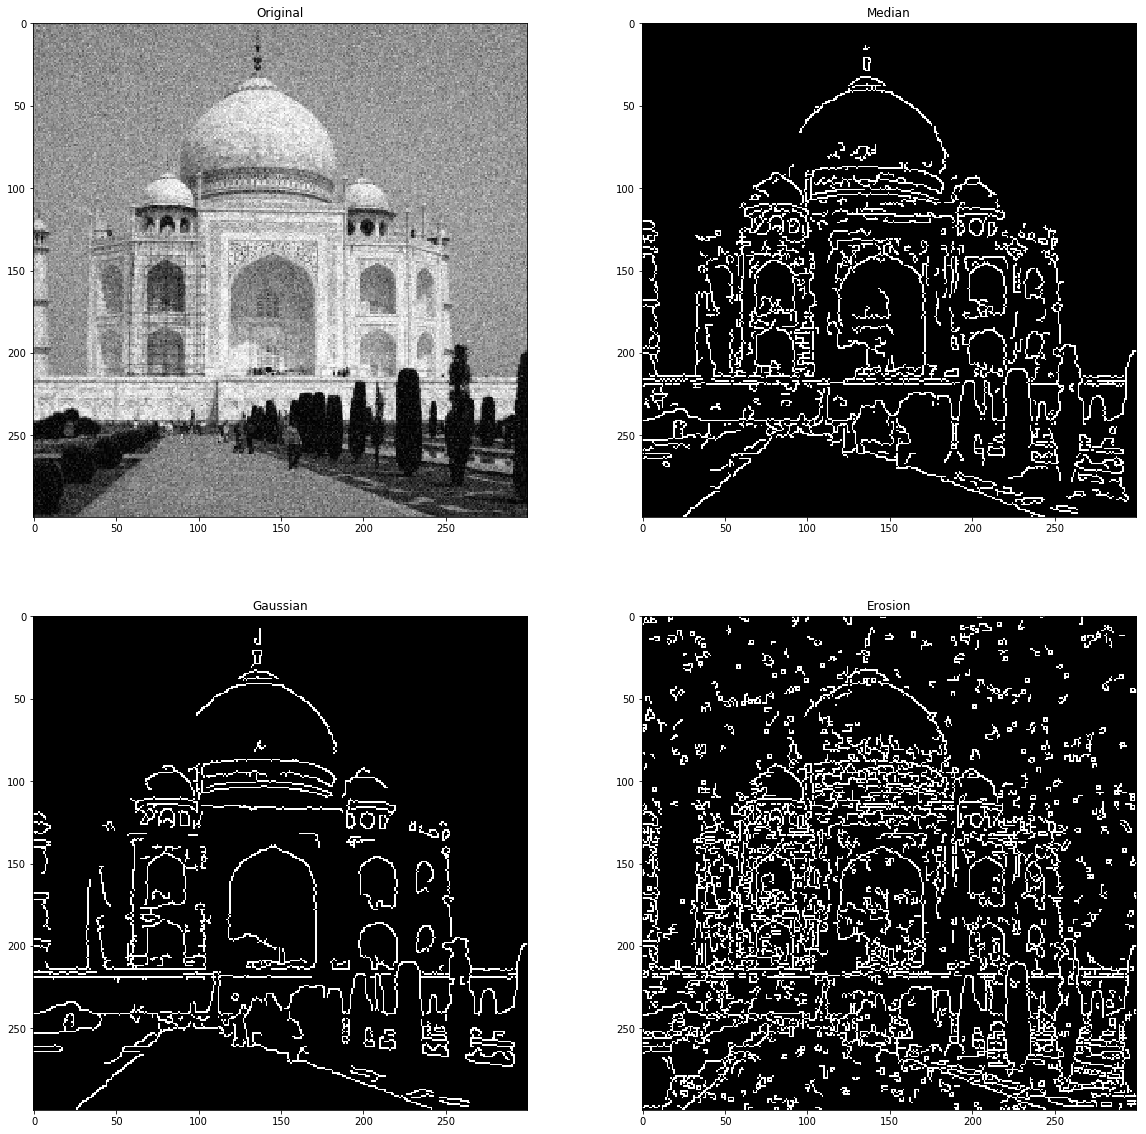

In [9]:
edges = [img]
for im in images[1:]:
    edges.append(cv.Canny(im, 100,200))

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
for ind, p in enumerate(edges):
    ax = axs[ind//2, ind%2]
    ax.title.set_text(titles[ind])
    ax.imshow(p, cmap='gray')
plt.show()

### Considerações:

    * Melhor filtro para ruído do tipo Salt and Pepper: Median filter
    * Gaussian and Mean atrapalham na detecção de contornos, diminuem a definição

## Detecção de olhos e sorrisos

In [25]:
# Create the face detecting function 
def detect(img):

    img_2 = img.copy()
    face = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
    face_detect = face.detectMultiScale(img_2,scaleFactor = 1.3,minNeighbors = 3)
    
    len(face_detect)
    for (x, y, w, h) in face_detect:
        cv.rectangle(img_2, (x, y), (x+w, y+h), (255, 255, 255), 1)
        
        eye = cv.CascadeClassifier('haarcascade_eye.xml')
        eye_detect = eye.detectMultiScale(img_2,scaleFactor = 1.3,minNeighbors = 3)
        for (x, y, w, h) in eye_detect:
            cv.rectangle(img_2, (x, y), (x+w, y+h), (0, 0, 255), 1)
            
        smile = cv.CascadeClassifier('haarcascade_smile.xml')
        smile_detect = smile.detectMultiScale(img_2,scaleFactor = 1.3,minNeighbors = 3)
        for (x, y, w, h) in smile_detect:
            cv.rectangle(img_2, (x, y), (x+w, y+h), (0, 255, 0), 1)
        
    return img_2

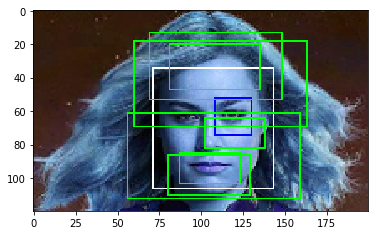

In [26]:
face = cv.imread('./../../figs/hero.png')
face = face[30:150, 80:280]
detected = detect(face)
plt.imshow(detected, cmap = 'gray')
plt.imshow(detected);

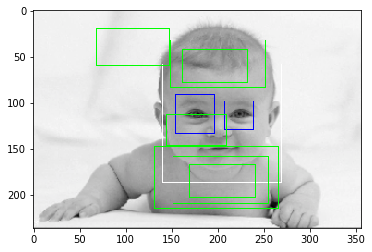

In [27]:
face = cv.imread('./../../figs/baby.png')
detected = detect(face)
plt.imshow(detected, cmap = 'gray')
plt.imshow(detected);

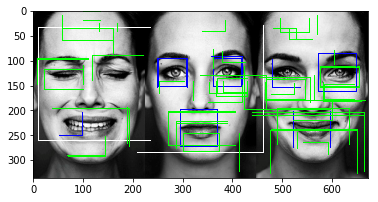

In [30]:
face = cv.imread('./../../figs/face.jpg')
detected = detect(face)
plt.imshow(detected, cmap = 'gray')
plt.imshow(detected);